### Question 4.

- The data was imported and pre-processed as in ***Question 1***'s import of text data and the application of 'pos_tag()', 'regxp_tokenize()' and 'bigrams()'

In [1]:
from nltk import pos_tag, bigrams, regexp_tokenize, corpus, FreqDist, collocations, BigramCollocationFinder
import pandas as pd
import math

C:\Users\user\anaconda3\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline

In [4]:
file = open(file='./positive_reviews_of_Video_Games.txt', mode = 'r')
lines = file.readlines()
doccie = ''
for line in lines:
    doccie += line.split('\t')[2].lower()        
file.close()

stop_words = set(corpus.stopwords.words('english'))

wds = regexp_tokenize(doccie, pattern = r"[\w']+")

wds = [wrd for wrd in wds if not wrd in stop_words]

wds_with_pos = pos_tag(wds)

bigrams_pos = list(bigrams(wds_with_pos))

### Method 1

- Similar to ***Question 3***, a frequency calculation function called ***freq_o_bigrams()*** was created.
- The function takes pos_tagged bigrams as input and gives an output of each bigram and its frequency as observed from the tokenized word list.
- This time the function includes an 'if' statement to filter the bigrams using pos_tags, removing frequent bigrams that aren't actually collocations. 

In [5]:
def freq_of_bigrams(bigrams_pos):
#An empty dictionary is used to instantiate the repository of bigrams and their frequencies.
    bigrams_freqs = {}
#A list of acceptable pos_tag pairs from the first and second words of the bigrams. 
#This list is used by  the nested if statement to gauge whether the bigram is accepatble.
    pos_list = ['JJNN', 'NNPNNP', 'NNPNN', 'NNNN']
    
    for frst_e, snd_e in bigrams_pos:
        frst_w, frst_pos = frst_e[0], frst_e[1]
        snd_w, snd_pos = snd_e[0], snd_e[1]
#An 'if' statement is added evaluate if the bigram has been ecountered before in the
#the loop. If true, the next if statement is then evaluated.
        if (frst_w, snd_w) in bigrams_freqs:
#This 'if' statement matches the pos_tags of the two bigram words to see if their combination
#is acceptable as a collocation by observing if it is included in the 'pos_list' defined above.
#If true, the counter adds 1 to the frequency value for the bigram.
            if frst_pos + snd_pos in pos_list:
                bigrams_freqs[(frst_w, snd_w)] += 1
#If the loop is encountering the bigram for the first time, it then tests the condition
#of the 'if' statement nested in the else statement.
        else:
#This 'if' statement matches the pos_tags of the two bigram words to see if their combination
#is included in the 'pos_list' defined above. If true, the counter adds 1 to the frequency value of the bigram.   
            if frst_pos + snd_pos in pos_list:
                bigrams_freqs[(frst_w, snd_w)] = 1
    return bigrams_freqs

- A function for counting words called ***freq_of_wds*** is created in the cell below.
- The function returns a dictionary with all the tokenized words and their respective frequencies in the reviews.

In [6]:
def freq_of_wds(wds):
#The function starts with an empty dictionary to instantiate the collection of words in and 
# their frequencies.
    wds_freqs = {}
#A 'for-loop' goes over each over in the tokenized list
    for wrd in wds:
#An 'if' statement checks a condition if a word on the current loop has been added to the wds_freq
#dictionary. If true, 1 is added to the corresponding value of the word in the dictionary
        if wrd in wds_freqs:
            wds_freqs[wrd] += 1
#If the word has not been added before, the else statement is then activated and the word is 
#entered into the dictionary for the first time and given a value of 1.
        else:
            wds_freqs[wrd] = 1
    return wds_freqs

In [7]:
freq_of_wds = freq_of_wds(wds)

- A pandas Dataframe ***wds_df*** is then created to store and display the words/tokens and their respective frequencies.

In [8]:
wds_df = pd.DataFrame(data = list(freq_of_wds))            #creating word freq dataframe
wrd_freqs = pd.Series(list(freq_of_wds.values()))
wds_df = pd.concat([wds_df, wrd_freqs], axis=1)
wds_df.columns = ['word', 'word_frequency']

- The top 40 most common tokens in the reviews. This is after the removal of the common English stop words.

In [9]:
wds_df.sort_values(by=['word_frequency'], ascending=False).head(40)

,word,word_frequency
65,game,11137
72,games,3020
79,like,2790
7,one,2710
189,get,2393
25,play,2063
86,great,1966
64,fun,1839
11,graphics,1722
12,good,1709


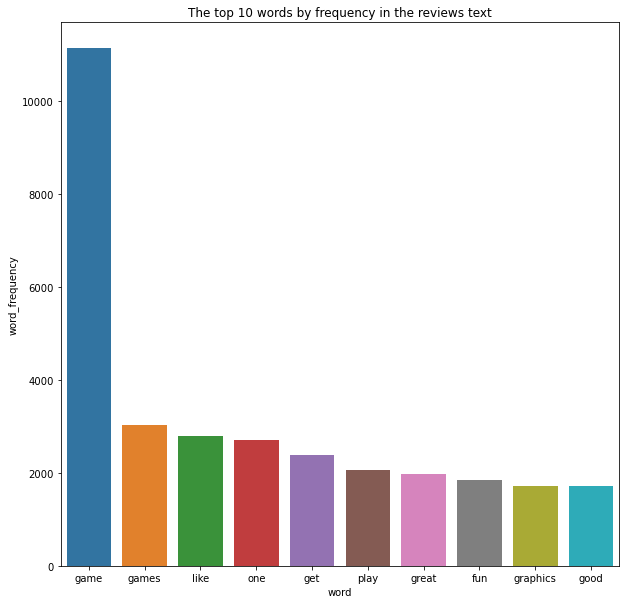

In [10]:
plt.figure(1, figsize=(10,10))
sns.barplot(x = wds_df.sort_values(by=['word_frequency'], ascending=False).head(10)['word'], 
            y = wds_df.sort_values(by=['word_frequency'], ascending=False).head(10)['word_frequency'], )
plt.title('The top 10 words by frequency in the reviews text')
plt.show()

- A pandas Dataframe ***df*** is then created to store and display the top 40 bigrams and their respective frequencies.

In [11]:
df = pd.DataFrame(list(freq_of_bigrams(bigrams_pos)))
vals = pd.Series(list(freq_of_bigrams(bigrams_pos).values()))
df = pd.concat([df, vals], axis=1)
df.columns = ['1st_word', '2nd_word', 'bigram_frequency']
df.sort_values(by=['bigram_frequency'], ascending=False).head(40)

,1st_word,2nd_word,bigram_frequency
82,great,game,319
627,game,play,186
2929,x,box,163
429,fun,game,163
10,single,player,161
114,good,game,158
33139,super,smash,152
973,theft,auto,148
255,game,game,144
155,video,game,137


- The Mutual Information of the bigrams calculations below are based on N = total number of words tokenized.

In [12]:
N = len(wds)
N

316022

- A 'for-loop' is used to go through each bigram in the bigrams dataframe ***df***.
- The code below demonstrates how the mutual information is calculated using the formula provided in week 3 tutorial.

In [13]:
#The mutual information list is initialised below:
mi_list = []
#'for-loop' from index 0 to the last entry on the bigrams dataframe 'df'.
for i in range(len(df)):
#The block below takes the strings of the first and second words in each bigram in the loop 
    frst_w = df.iloc[i][0]
    snd_w = df.iloc[i][1]
#The strings of words taken are then used to reference for the respective word frequencies
# in the the 'freq_wds' dataframe to calculate the probabilities of each word.
#The probability of the bigram itself is also calculated from its frequency recorded in 'df'
    p_frst_w = freq_of_wds[frst_w]/N        
    p_snd_w = freq_of_wds[frst_w]/N         
    p_bigram = df.iloc[i][2]/N              
#The mutual information of the current bigram in the loop is then appended on the 'mi_list'
    mi_list.append(math.log(p_bigram/(p_frst_w*p_snd_w),2.0))
    

- A pandas Dataframe ***df*** is then created to store and display the top 40 bigrams and their respective mutual information values.
- It is worth noting that the formula given in the tutorial gives the same value for numerous bigrams.

In [14]:
mi = pd.Series(mi_list)
df = pd.concat([df, mi], axis=1)
df.columns = ['1st_word', '2nd_word', 'bigram_frequency', 'mi']
df.sort_values(by=['mi'], ascending=False).head(40)

,1st_word,2nd_word,bigram_frequency,mi
20276,hospitalbe,driver,1,18.269665
4823,ivory,bring,1,18.269665
15681,maneuverable,hovercraft,1,18.269665
35372,shinier,brawl,1,18.269665
15682,invulnerable,destruction,1,18.269665
7858,celaeron,protoss,1,18.269665
7857,zerg,celaeron,1,18.269665
27694,siberian,base,1,18.269665
44704,directdraw,acceleration,1,18.269665
43786,finder,position,1,18.269665


### Method 2

- In the alternative method the NLTK library's modules are used for evaluating the mutual information metric:

  - 'FreqDist()' -> calculates the token frequencies and returns them in a list of tuples containing the token and its respective frequency value. It has a method call '.most_common()' which sorts the tokens by descending frequency.
  - 'collocations()' -> locates collocations in the tokenized list. The method call '.BigramAssocMeasures() is called and it gives a collection of bigram association measures which are used in this exercise.'
  - 'BigramCollocationFinder()' -> finds and ranks bigram collocations or other association measures. 

In [15]:
#This function actually gives the same results as the frequency functions used in Method 1
wrd_freq_dist = FreqDist(wds)
wrd_freq_dist.most_common(40)

[('game', 11137),
 ('games', 3020),
 ('like', 2790),
 ('one', 2710),
 ('get', 2393),
 ('play', 2063),
 ('great', 1966),
 ('fun', 1839),
 ('graphics', 1722),
 ('good', 1709),
 ('time', 1566),
 ('first', 1436),
 ('best', 1371),
 ('really', 1329),
 ('also', 1321),
 ('even', 1316),
 ('well', 1229),
 ('much', 1140),
 ('2', 1110),
 ('xbox', 1070),
 ('quot', 1018),
 ('gamecube', 1010),
 ('system', 1003),
 ('new', 994),
 ('many', 965),
 ('better', 957),
 ('would', 909),
 ('still', 882),
 ('characters', 873),
 ('playing', 871),
 ('gameplay', 868),
 ('buy', 868),
 ('player', 867),
 ('played', 829),
 ('halo', 790),
 ('go', 788),
 ('little', 784),
 ('people', 783),
 ('way', 775),
 ('want', 772)]

In [16]:
#Bigrams MI calculations
bigram_measure = collocations.BigramAssocMeasures()

bigrams_finder = BigramCollocationFinder.from_words(wds)

#The probabilities of each bigram are calculated using the code below:
p_bigram = bigrams_finder.score_ngrams(bigram_measure.raw_freq)

In [17]:
#The bigrams with the top 10 highest probabilities 
p_bigram[:10]

[(('great', 'game'), 0.0010094233945737955),
 (('game', 'play'), 0.000759440798425426),
 (('one', 'best'), 0.0007183044218440489),
 (('resident', 'evil'), 0.0006961540652233073),
 (('x', 'box'), 0.0005980596287600231),
 (('replay', 'value'), 0.0005664162621589636),
 (('play', 'game'), 0.0005600875888387518),
 (('fun', 'game'), 0.0005569232521786458),
 (('game', 'ever'), 0.0005537589155185399),
 (('games', 'like'), 0.000541101568878116)]

- The Mutual Information (MI) of the bigrams is then calculated by changing the method call on the code that was used to calculate the probabilities above.
- The method call used is '.mi_like' 

In [18]:
#Mutual Information (MI) 
mi_bigram = bigrams_finder.score_ngrams(bigram_measure.mi_like)

- A pandas Dataframe ***mi_df*** is then created to store and display the top 40 bigrams and their respective mutual information values.

In [19]:
mi_df = pd.DataFrame(mi_bigram, columns=['bigram', 'mi'])
mi_df.sort_values(by=['mi'], ascending=False).head(40)

,bigram,mi
0,"(resident, evil)",155.854801
1,"(theft, auto)",132.071388
2,"(grand, theft)",130.627985
3,"(tony, hawk)",99.840474
4,"(replay, value)",92.151724
5,"(eternal, darkness)",82.455944
6,"(smash, bros)",73.070560
7,"(x, box)",71.900030
8,"(golden, sun)",53.934750
9,"(star, wars)",52.497725


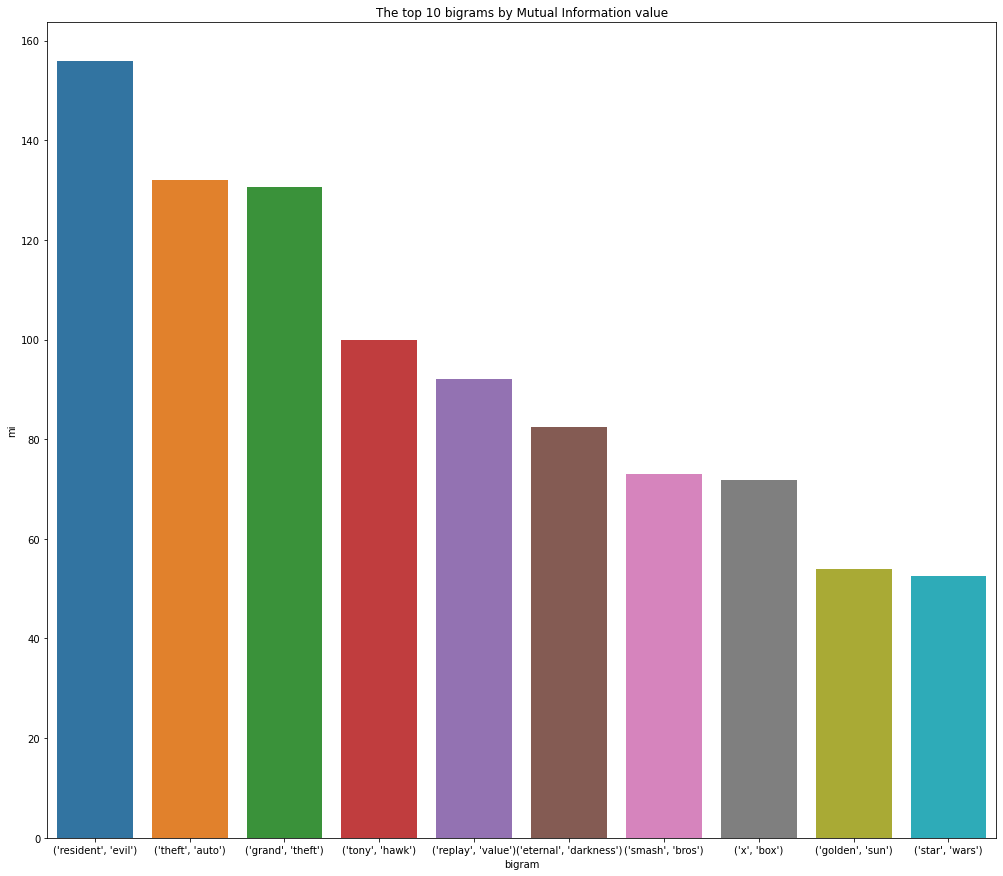

In [20]:
plt.figure(3, figsize=(17,15))
sns.barplot(x = mi_df.sort_values(by=['mi'], ascending=False).head(10)['bigram'], 
            y = mi_df.sort_values(by=['mi'], ascending=False).head(10)['mi'], )
plt.title('The top 10 bigrams by Mutual Information value')
plt.show()

- The MI values obtained are significantly different from the values obtained using the formula in the tutorial slides.
- This method also produced a top 40 that looks legitimate in the sense that these bigrams  are actually very popular video game titles, console names and common terms in the gaming space.

- An alternative approach is to call a different method instead of the 'mi_like'.
- The '.pmi' method actually gives the Pointwise Mutual Information, which is a variation of mutual information.

In [21]:
#Pointwise Mutual Information 
#bigrams_finder.apply_freq_filter()
pmi_bigram = bigrams_finder.score_ngrams(bigram_measure.pmi)

- A pandas Dataframe ***pmi_df*** is then created to store and display the top 40 bigrams and their respective pointwise mutual information values.

In [22]:
pmi_df = pd.DataFrame(pmi_bigram, columns=['bigram', 'pmi'])
pmi_df.sort_values(by=['pmi'], ascending=False).head(40)

,bigram,pmi
0,"(''melody, pianistonio'')",18.269665
723,"(redman, del)",18.269665
634,"(ofaction, swordfighting)",18.269665
635,"(officier, wiggam)",18.269665
636,"(ofhas, optiontional)",18.269665
637,"(ofyour, whereabouts)",18.269665
638,"(omar, tapia)",18.269665
639,"(ooohing, ahhing)",18.269665
640,"(oppressive, fascist)",18.269665
641,"(optiontional, missionsdecent)",18.269665


- The Pointwise Mutual Information method produced a top 40 collection with bigrams with the same value as the bigrams seen from method 1. 
- The top 40 bigrams shown are not the same as those in method 1, but have the same values perhaps the algorithm followed a different arrangement. 
- This shows that the formula given in the tutorial is not for mutual information but for pointwise mutual information. 

- If we apply a filter to remove bigrams that occurred less than three times

In [23]:
bigrams_finder.apply_freq_filter(3)
pmi_bigram = bigrams_finder.score_ngrams(bigram_measure.pmi)

pmi_df_filtered = pd.DataFrame(pmi_bigram, columns=['bigram', 'pmi'])
pmi_df_filtered.sort_values(by=['pmi'], ascending=False).head(40)

,bigram,pmi
0,"('flight, simulator')",16.684703
3,"(oliver, platt)",16.684703
4,"(shinji, mikami)",16.684703
1,"(fw, 190)",16.684703
2,"(hideki, kamiya)",16.684703
5,"(billy, zane)",16.269665
6,"(hulk, hogan)",16.269665
7,"(kelly, slater)",16.269665
8,"(striker, 1945)",16.269665
9,"(ted, dibiase)",16.269665
